In [1]:
import pandas as pd
import numpy as np

Train=np.array(pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv'))
Test=np.array(pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv'))

X_train,y_train=Train[:,1:],Train[:,0]
X_train = X_train.reshape(-1, 28, 28, 1)/255
X_test,y_test=Test[:,1:],Test[:,0]
X_test = X_test.reshape(-1, 28, 28, 1)/255

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.backend import clear_session

# Check if TensorFlow detects the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Display GPU details
print(tf.config.list_physical_devices('GPU'))
clear_session()

model = Sequential([
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537,898 (2.05 MB)

 Trainable params: 537,450 (2.05 MB)

 Non-trainable params: 448 (1.75 KB)

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    shear_range=0.15,
    fill_mode='same'
)

# Fit the data generator to the training data
datagen.fit(X_train)

valid=(X_test,y_test)
valid=valid[:1000]

In [4]:
# Initialize ImageDataGenerator for Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,        # Random rotation between 0 and 15 degrees
    width_shift_range=0.15,    # Random horizontal shift
    height_shift_range=0.15,   # Random vertical shift
    zoom_range=0.2,           # Random zoom
    shear_range=0.3,          # Random shear
    horizontal_flip=False,    # Flip not used for MNIST-like images
    fill_mode='nearest'       # Fill in missing pixels
)

# Fit the data generator on X_train (Optional but helpful for datasets like this)
datagen.fit(X_train)

# Create an iterator to check the augmentations
augmented_data_iter = datagen.flow(X_train, y_train, batch_size=100)

model.fit(augmented_data_iter, epochs=200, steps_per_epoch=len(X_train)//100+1,validation_data=valid)

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733226827.451045      66 service.cc:145] XLA service 0x7f74e0006c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733226827.451139      66 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  6/601 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.0906 - loss: 2.6394

I0000 00:00:1733226830.812373      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


597/601 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2559 - loss: 2.1367

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


601/601 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.2566 - loss: 2.1348 - val_accuracy: 0.7547 - val_loss: 1.1993
Epoch 2/200
601/601 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.6227 - loss: 1.2265 - val_accuracy: 0.9163 - val_loss: 0.3437
Epoch 3/200
601/601 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.7808 - loss: 0.7393 - val_accuracy: 0.9426 - val_loss: 0.2174
Epoch 4/200
601/601 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.8484 - loss: 0.5181 - val_accuracy: 0.9508 - val_loss: 0.1814
Epoch 5/200
601/601 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.8868 - loss: 0.3933 - val_accuracy: 0.9577 - val_loss: 0.1496
Epoch 6/200
601/601 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9038 - loss: 0.3281 - val_accuracy: 0.9629 - val_loss: 0.1295
Epoch 7/200
601/601 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9180 - loss: 0.2774 - val_accuracy: 0.9655 - val_loss: 0.1245
Epoch 8/200
601/601 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9284 - loss: 0.2416 - val_

In [5]:
import numpy as np
import scipy.stats

def ensemble_predictions(model, X_test, num_versions=10):
    """
    Perform ensemble predictions by generating augmented versions of each image in X_test,
    obtaining predictions for each version, and then taking the mode of the predictions.
    
    Args:
    - model (keras.Model): Trained model to make predictions.
    - X_test (numpy array): Test data with shape (n_samples, height, width), normalized (values between 0 and 1).
    - num_versions (int): Number of augmented versions for each image to generate.

    Returns:
    - y_pred (numpy array): Final predicted labels (mode of 10 predictions for each image).
    """

    # Define the ImageDataGenerator with augmentation parameters
    datagen = ImageDataGenerator(
    rotation_range=30,        # Random rotation between 0 and 15 degrees
    width_shift_range=0.15,    # Random horizontal shift
    height_shift_range=0.15,   # Random vertical shift
    zoom_range=0.2,           # Random zoom
    shear_range=0.3,          # Random shear
    horizontal_flip=False,    # Flip not used for MNIST-like images
    fill_mode='nearest'       # Fill in missing pixels
)
    
    datagen.fit(X_test[0].reshape(1,28,28,1))
    
    # Create an empty list to store the predictions
    predictions = []

    # Generate predictions for each image in X_test
    for i in range(len(X_test)):
        image = X_test[i].reshape(1,28,28,1)  # Select one image (batch size of 1)
        
        # Generate augmented images
        augmented_gen = datagen.flow(image, batch_size=1)

        augmented_images=[]

        for j in range(10):
            augmented_images.append(next(augmented_gen).reshape(28,28,1))

        augmented_images=np.array(augmented_images)
        
        predict =scipy.stats.mode(np.argmax(model.predict((augmented_images),verbose=0),axis=1))[0]

        predictions.append(predict)

        if(i%100==0):
            print(i)
    
    # Convert the list of predictions to a numpy array
    y_pred = np.array(predictions)
    
    return y_pred

X_test,y_test=Test[:,1:],Test[:,0]
X_test = X_test.reshape(-1, 28, 28, 1)/255

# Example usage with model and X_test
y_pred = ensemble_predictions(model, X_test, num_versions=10)

# Print the first 10 predictions
print(y_pred[:10])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
[7 2 1 0 4 1 4 9 5 9]


Test Accuracy: 0.9957


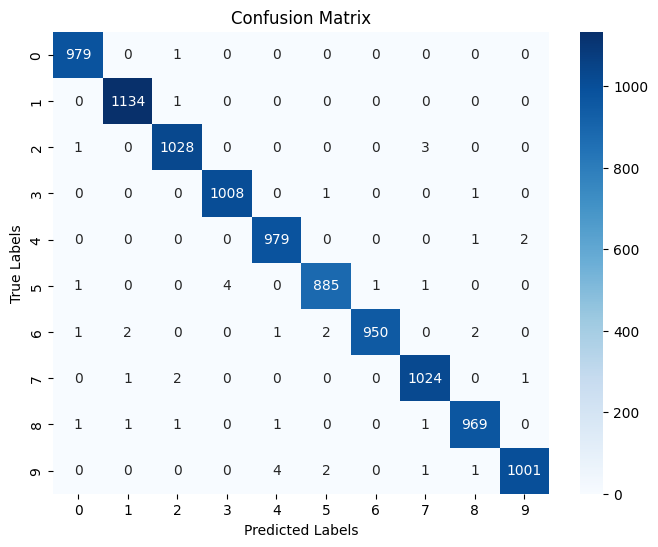

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# # Assuming y_pred contains the predictions and y_test contains the true labels
# y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels if using softmax
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [7]:
import os.path
if os.path.isfile('models/digit_recognition.h5') is False:
    model.save('models/digit_recognition.h5')